# Analysis and forecasting of Transactional Time Series

This project has been developed during the Intensive Training School on Big Data and Machine Learning of the [9th edition of the International Young Scientists Conference on Computational Science](http://ysc.escience.ifmo.ru/), organized by University of Crete (Greece) ITMO University and Lomonosov Moscow State University (Russia) and that has been taken place online from the 5th to the 13th of September 2020. 

Team name: **ManLo**

Team members:
- [Lorenza Pacini](https://github.com/lorpac), PhD student at Université de Lyon (France)
- [Manuk Arabov](https://github.com/manukarabov), master student at ITMO University (Russia)

Project mentor: Peter Gladilin, ITMO University (Russia)

## Dataset import

We study a dataset of credit card transactions made in Russia between March and September 2017.

Install required packages

In [136]:
! pip install -r requirements.txt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [138]:
os.makedirs("results", exist_ok=True)

In [139]:
data = pd.read_csv("DATA_Transactions.csv", index_col=0)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [140]:
data

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224729,2.601024,NaN,NaN,NaN,MOSKVA,RUS,643.0,381bcceaad6c0d72a795e2f09950b3af,55.676,37.872,6011,NaN,NaN,NaN,fff0535ce27b0551cb1da1ef6852895e,2017-03-06,NaN,NaN
1224730,2.717837,NaN,NaN,NaN,MOSKVA,RUS,643.0,90ffc453a1c176755ef9225a77df81a1,55.502,37.582,6011,NaN,NaN,NaN,fff0535ce27b0551cb1da1ef6852895e,2017-03-18,NaN,NaN
1224731,2.859485,NaN,NaN,NaN,MOSKVA,RUS,643.0,90ffc453a1c176755ef9225a77df81a1,55.502,37.582,6011,NaN,NaN,NaN,fff0535ce27b0551cb1da1ef6852895e,2017-02-26,NaN,NaN
1224732,3.715220,NaN,NaN,NaN,MOSKVA,RUS,643.0,5b4e3e9f63d011a61a8d4fa065b6fa97,55.716,37.787,6011,NaN,NaN,NaN,fff0535ce27b0551cb1da1ef6852895e,2017-02-20,55.734,37.662


In [141]:
len(data)

1047190

## Data preprocessing

We eliminate data about atm and MCC 6011: FINANCIAL INSTITUTIONS - AUTOMATED CASH DISBURSEMENTS

In [142]:
data = data[data["atm_address"].isnull()]

In [143]:
len(data)

830158

In [144]:
data.drop(columns=["atm_address", "atm_address_lon", "atm_address_lat"], inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [145]:
len(data[data.mcc == 6011])

11024

In [146]:
data = data[data.mcc != 6011]

In [147]:
len(data)

819134

Let's check if all transactions are made with the same currency.

In [148]:
data.currency.value_counts()

643.0    819104
978.0        26
784.0         3
840.0         1
Name: currency, dtype: int64

We remove transactions that are not in roubles.

In [149]:
data = data[data.currency == 643.0]

In [150]:
len(data)

819104

We can now remove the currency column.

In [151]:
data.drop(columns=["currency"], inplace=True)

Let's check if the data are well-distributed in time

In [152]:
data.sort_values("transaction_date", inplace=True)

In [153]:
counts = data.transaction_date.value_counts()
dates = data.transaction_date.unique()

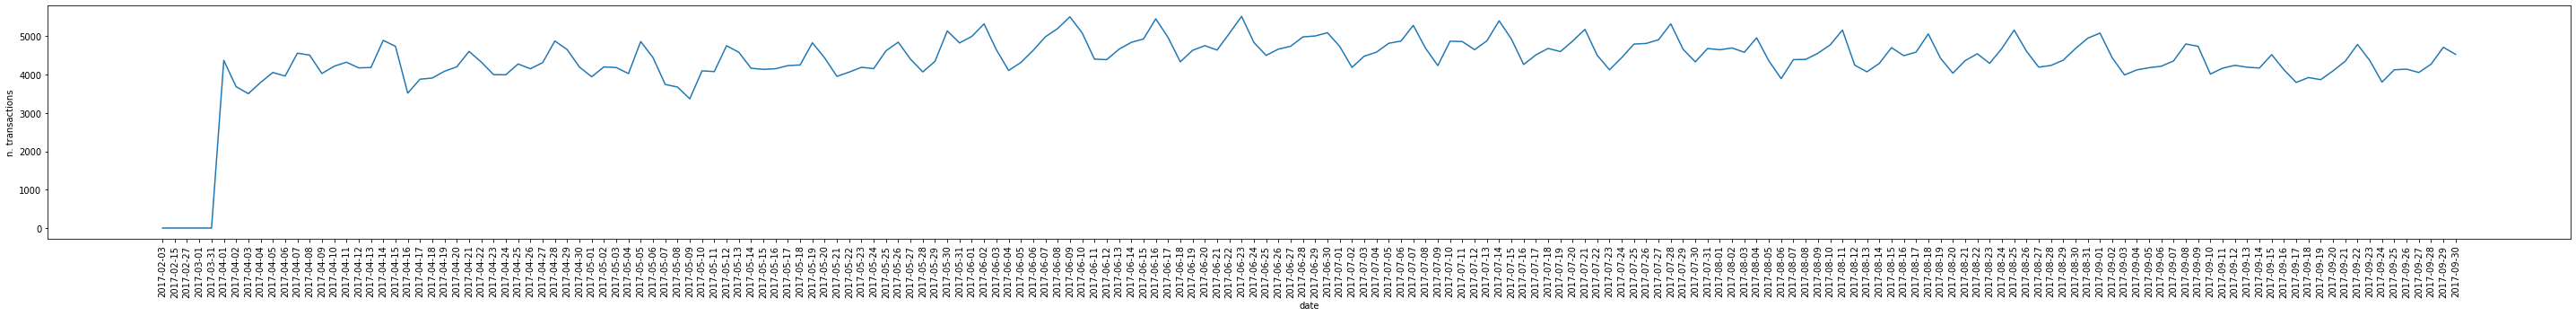

In [154]:
fig = plt.figure(figsize=(40,5))
plt.plot(range(len(dates)), [counts[x] for x in dates])
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("n. transactions")
plt.tight_layout()
plt.savefig(os.path.join("results", "time_series_orig"))
plt.show()

Large amount data from 1st April  to 30th September. We'll consider only these points.

In [155]:
data = data[data.transaction_date >= "2017-04-01"]

In [156]:
counts = data.transaction_date.value_counts()
dates = data.transaction_date.unique()

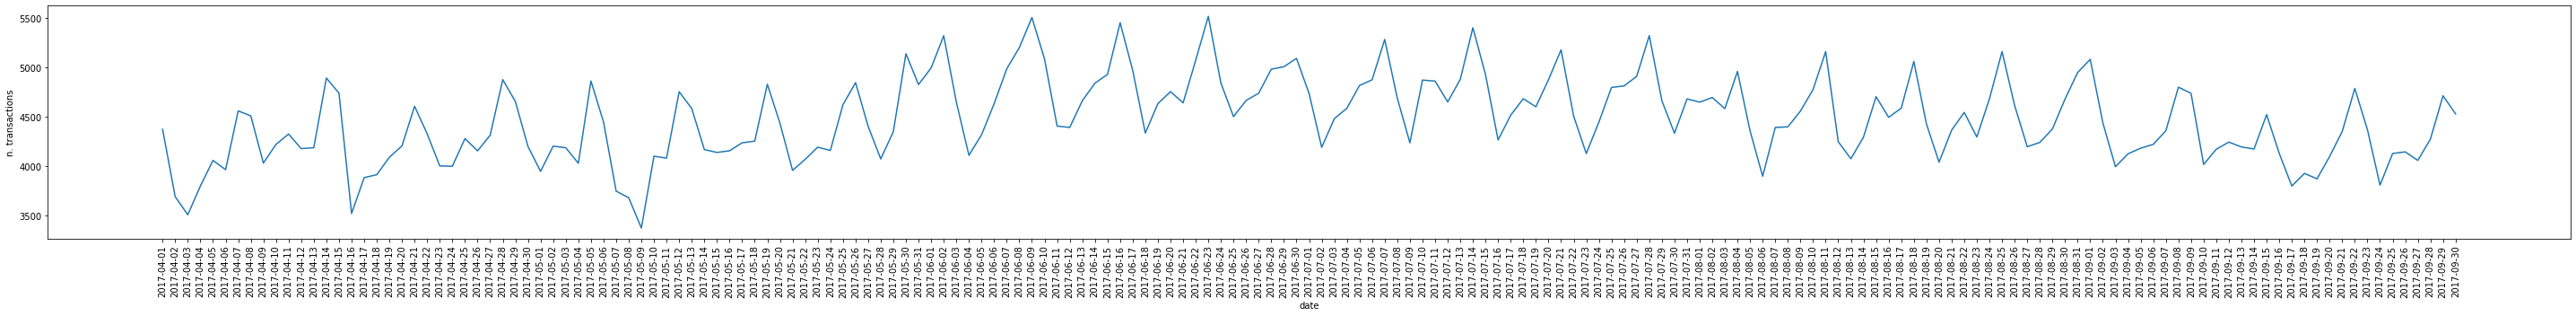

In [157]:
fig = plt.figure(figsize=(40,5))
plt.plot(range(len(dates)), [counts[x] for x in dates])
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("n. transactions")
plt.tight_layout()
plt.savefig("time_transactions")
plt.show()

Let's check the locations of the transactions (city level).

In [158]:
cities = data.city.unique()

In [159]:
cities = [str(c) for c in cities]

In [160]:
cities = sorted(cities)

In [161]:
for c in cities[0:100]:
    print(c)

,
.
105, IVANA GO
108 KM MINSKO
117209
12 KM BAYKALS
127562
136,5 KM AVTO
1375+300 KM A
154 KM A/D VO
155 KM A/D M-
155 KM AD MOS
165 KM A-D MO
1660 A/D M-33
21 KM KALUZHS
23, 1, OPOLCH
24+500 KM A-D
306+300 KM A-
311 KM A/D VO
33, 3, ISAKOV
33-Y KM YAROS
416 KM A/D MO
53 KM
77 - MOSCOW
87 KM MKAD
ABAKAN
ABATSKOE
ABINSK
ABINSK REGION
ABRAU DYURSO
ABRAU-DYURSO
ACHINSK
ADLE
ADLER
ADYGEJA
ADYGEYA
ADYGEYA RESP
ADYGEYSK
ADYIGEYA
ADZHEROM
AEROPORT
AEROPORT DOMO
AEROPORT VORO
AEROPORTA DOM
AFANASOVKA
AFANASOVO
AFIPSKIY
AFONINO
AGAFONIKHA
AGALATOVO
AGALATOVSKOE
AGAPOVKA
AGOY
AGROGOROD
AGROLES
AGRONOM
AKBERDINO
AKHATYRSKIY
AKHLEBINO
AKHTUBINSK
AKSAI
AKSAIY S.
AKSAJ
AKSAY
AKSENO-BUTYRS
AKSUBAEVO
AKTASH
ALABINO
ALABUSHEVO
ALABUSHEVO SO
ALAPAEVSK
ALATORKA
ALEKHOVSHCHIN
ALEKSANDRO-NE
ALEKSANDROV
ALEKSANDROVSK
ALEKSEEVKA
ALEKSEEVSKOE
ALEKSIN
ALEKTROUGLI
ALENINO
ALEXANDROV
ALEYSK
ALFIMOVO
ALKINO-2
ALMETEVSK
ALMETYEVSK
ALNASHI
ALTAIYSKIIY R
ALTUFEVO
ALTUN
ALUPKA
ALUSHTA
ANAPA
ANAPSKAYA
ANAPSKIIY REG
A

There are some mistakes in cities' names. We manually correct for large cities. (Another option: get city from location coordinates, but connection problems).

In [162]:
data.loc[:, 'city'] = data.loc[:, 'city'].str.upper()
data.loc[:, 'city'] = data.loc[:, 'city'].str.strip()

In [163]:
data['city'] = data['city'].replace(['MOSKVA.','MOSKVAA','MOSKVE','MOSKVY','MOSKWA', 'G MOSKVA','G MOSKVA     ', 'G. MOSKOW ', 'G. MOSKVA', 'MOCKVA', 'MOSCOW       ', 'MOSKOW','MOSKOW       '
                                    ,'MOSKVA','MOSKVA       ','MOSKVA G','MOSKVA G     ', 'MOSKVA,', 'MSK', 'MLSKVA', 'G.MOSKVA', 'G. MOSKOW'], 'MOSCOW')
data['city'] = data['city'].replace(['G SANKT-PETER','G. SANKT-PETE','PETERBURG','S PETERBURG','S-PETER', 'S-PETERBURG','S-PETERSBURG', 'S. PETERBURG', 'S.-PETERBURG', 'S.-PETERBURG', 'S.PETERBURG', 'S.PETERBURG  ','S.PETERSBURG',
                                    'SAINT PETERSB','SAINT-PETERBU','SAINT-PETERSB', 'S.-PETERBURG', 'SANK-PETERBUR', 'SANKT - PETER', 'SANKT PERERBU','SANKT PETERBU', 'SANKT-PETEBUR', 'SANKT-PETER', 'SANKT-PETERBO',
                                    'SANKT-PETERBU', 'SANKT-PETERS', 'SANKT-PETERSB', 'SANKT-PETERUB', 'SANKT-PRTRRBU', 'SANKT-PTERBUR', 'SANQT PETERBU', 'SANT PETERBUR', 'SNPETERBURG', 'SPB', 'SPB          ', 'SPETERBURG', 'SPETERSBURG', 'SPETERSRURG','C-PETERBURG', 'S.-PETERBURG', 'ST PETERBURG', 'ST PETERBURG ', 'ST PETERSBUR', 'ST PETERSBURG', 'ST-PETER', 'ST-PETER.', 'ST-PETERB.', 'ST-PETERBUR', 'ST-PETERBURG', 'ST-PETERBURG ', 
                                     'ST-PETERSBURG', 'ST-PETERURG', 'ST. PETERBURG', 'ST. PETERSBUR', 'ST.-PETERBURG', 'ST.-PETERSBUR', 'ST.PERESBURG', 'ST.PETERBURG', 'ST.PETERSBURG', 'ST.PETRESBURG', 'ST.PETRSBURG', 'ST/PETERSBURG', 'S.-PETERBURG', 'STPETE', 'STPETE       ', 'STPETERBURG', 'STPETERSBURG', 'S.-PETERBURG  '
                                    ], 'ST PETERSBURG')

In [164]:
data['city'] = data['city'].replace(['EKA-BURG','EKATERINB','EKATERINBOURG','EKATERINBURG','EKATERINBURG,', 'EKATERINBYRG','EKATERNIBURG', 
                                     'EKATERUBBYRG', 'EKATR', 'EKETERINBURG', 'EKT', 'ETATERINBURG', 'G EKATERINBUR'], 'EKATERINBURG')

In [165]:
data['city'] = data['city'].replace(['G NOVOSIBIRSK','G. NOVOSIBIRS','NOVOSIBIRSK G', 'NOOSIBIRSK'], 'NOVOSIBIRSK')

In [166]:
data['city'] = data['city'].replace(['NUGNIY NOVGOR','NOZHNIY NOVGO','NOVGOROD','NNOVGOROD','NIZNIY NOVGOR', 'NIZHNYI NOVGO','NIZJNIY NOVGO', 'NIZHNY NOVGOR', 'NIZHNIY NO', 
                                     'NIZHNIY NOVG', 'NIZHNIY NOVGO', 'NIZHNII NOVG','NIZHNII NOVGO', 'NIZHNIIY NOVG','NIZHNIJ NOVGO','NIZHHIY NOVGO', 'NIZHN.NOVGORD', 
                                     'NIZGNIY NOVGO', 'NIZH NOVGOROD', 'NIZH.NOVGOROD','NIJNII NOVGOR', 'NIJNIY NOVGOR', 'NIGHNIY NOVGO', 'NIGNIY NOVGOR', 'G NIZHNIY NOV', 
                                     'G. NIGNIY NOV', 'N NOVGOROD', 'N. NOVGOROD', 'N.-NOVGOROD', 'N.NOVGOROD'], 'N NOVGOROD')

In [167]:
data['city'] = data['city'].replace(['G KAZAN','KAZAN','KAZAN','KAZAN`','KAZANC'], 'KAZAN')

In [168]:
data.loc[:, 'country'] = data.loc[:, 'country'].str.upper()
data.loc[:, 'country'] = data.loc[:, 'country'].str.strip()

In [169]:
data['country'] = data['country'].replace('RU', 'RUS')

In [170]:
data.country.unique()

array(['RUS'], dtype=object)

## Data analysis

Quick check for correlations

In [171]:
data.corr()

,amount,home_add_lat,home_add_lon,mcc,pos_adress_lat,pos_adress_lon,work_add_lat,work_add_lon
amount,1.000000,0.001263,-0.022357,0.167054,-0.006973,-0.018821,0.009866,-0.035832
home_add_lat,0.001263,1.000000,-0.225154,-0.019859,0.806066,-0.197471,0.931891,-0.230688
home_add_lon,-0.022357,-0.225154,1.000000,0.015026,-0.200433,0.813928,-0.232643,0.906163
mcc,0.167054,-0.019859,0.015026,1.000000,-0.022512,0.009588,-0.014604,0.012020
pos_adress_lat,-0.006973,0.806066,-0.200433,-0.022512,1.000000,-0.221634,0.828714,-0.196010
pos_adress_lon,-0.018821,-0.197471,0.813928,0.009588,-0.221634,1.000000,-0.206305,0.819499
work_add_lat,0.009866,0.931891,-0.232643,-0.014604,0.828714,-0.206305,1.000000,-0.238017
work_add_lon,-0.035832,-0.230688,0.906163,0.012020,-0.196010,0.819499,-0.238017,1.000000


Correlation between home address and pos address and work address (expected) (Note: hogher correlation between home and work compared to home and pos / work and pos)

Let's check how many transactions we have per user

In [172]:
max(data.customer_id.value_counts().values)

1620

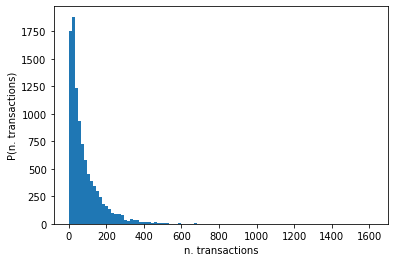

In [173]:
fig = plt.figure()
plt.hist(data.customer_id.value_counts().values, 100)
plt.xlabel("n. transactions")
plt.ylabel("P(n. transactions)")
plt.show()

Let's check how many transactions we have per MCC

In [174]:
max(data.mcc.value_counts().values)

340858

In [175]:
data.mcc.value_counts()

5411    340858
5814    111577
5812     53956
5499     38828
5541     36712
         ...  
5271         1
3351         1
7261         1
5044         1
9211         1
Name: mcc, Length: 242, dtype: int64

- 5411: grocery stores
- 5814: fast food restaurants
- 5812: restaurants
- 5499: convinience store

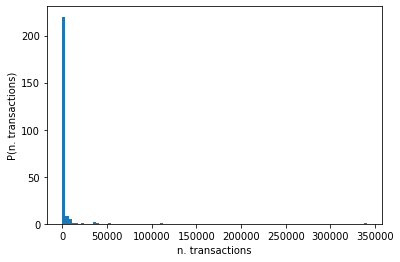

In [176]:
fig = plt.figure()
plt.hist(data.mcc.value_counts().values, 100)
plt.xlabel("n. transactions")
plt.ylabel("P(n. transactions)")
plt.show()

Let's do the same but grouping by mcc type (consider only mcc for which there are at least N (=10000) entries in total)

In [177]:
grouped_data_mcc = data.groupby("mcc")
sorted_mcc = data.groupby("mcc").size().sort_values(ascending=False).index

In [178]:
N = 10000
selected_mcc = [mcc for mcc in sorted_mcc if len(grouped_data_mcc.get_group(mcc)) > N]

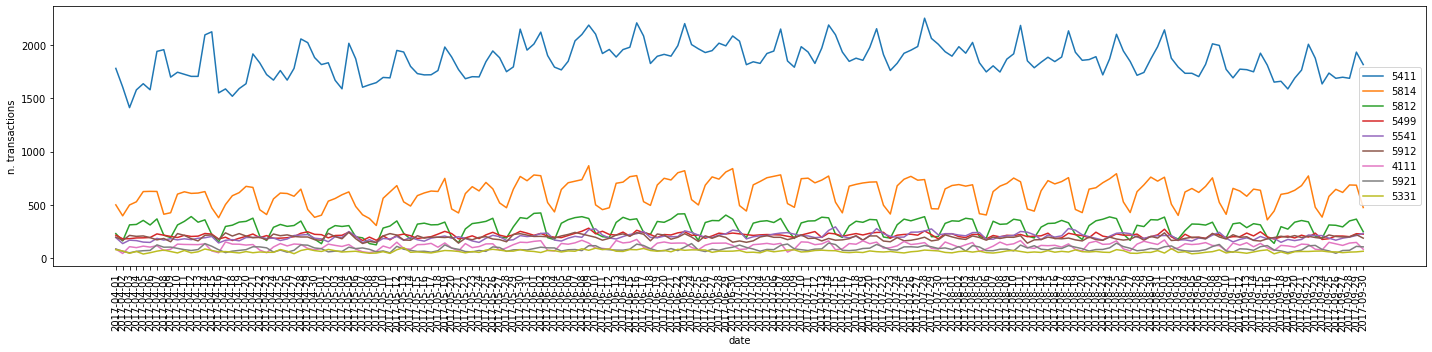

In [179]:
ts_all = {}
fig = plt.figure(figsize=(20,5))
for mcc in selected_mcc:
    subdata_mcc = grouped_data_mcc.get_group(mcc)
    subcounts_mcc = subdata_mcc.transaction_date.value_counts()
    ts_mcc = np.array([subcounts_mcc[x] if x in subcounts_mcc else 0 for x in dates])
    ts_all[mcc] = ts_mcc
    plt.plot(range(len(dates)), ts_mcc, label=mcc)
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("n. transactions")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("results", "time_transactions_mcc"))
plt.show()

Let's do the same analysis but plotting the amount spent (sum over all transactions).

In [180]:
def cumulated_amount(subdata, date):
    return subdata.groupby("transaction_date").get_group(date).amount.sum()

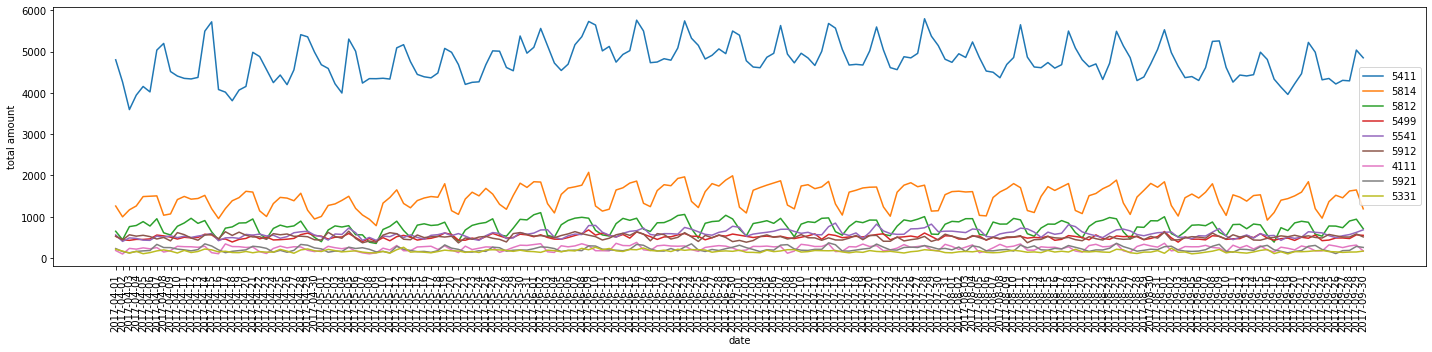

In [181]:
fig = plt.figure(figsize=(20,5))
for mcc in selected_mcc:
    subdata_mcc = grouped_data_mcc.get_group(mcc)
    subcounts_mcc = subdata_mcc.transaction_date.value_counts()
    plt.plot(range(len(dates)), [cumulated_amount(subdata_mcc, x) if x in subcounts_mcc else 0 for x in dates], label=mcc)
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("total amount")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("results", "time_amount_mcc"))
plt.show()

The trends seem the same as the ones for the number of transactions. We'll keep using the number of transactions.

In [182]:
import datetime
test_date = datetime.date.fromisoformat("2017-04-02")
test_date
test_date.weekday()

6

The minima correspond to Sundays.

Let's analyze the same trends but for single users. We select the ones for which we have many entries (at least 700).

In [183]:
data.groupby("customer_id").size().sort_values(ascending=False)

customer_id
f1075f6513de30f64d69cef2e4bb7b35    1620
5ac9db6c170b412c48870e3f9a60985a    1460
9f63d1fd486f6c13f35d627f9eca3d1d     964
21e57f5cb268c388ed77b3c4ae85dbf0     960
65112a3e724dad144aa61170877d9c8b     832
                                    ... 
e245f33d8ec289c63242a15e724d76f8       1
4d7797fa4f05a2bb859d8934113cea5a       1
853fd27bed7b198593da9beccd5bc061       1
7fb4030bc96a4dcdd4e6e0a3c271b413       1
19f4fd8b2e4cbdc77db9da9f683e706d       1
Length: 9965, dtype: int64

In [184]:
grouped_data_users = data.groupby("customer_id")
sorted_users = data.groupby("customer_id").size().sort_values(ascending=False).index

In [185]:
N_user = 700
selected_users = [user for user in sorted_users if len(grouped_data_users.get_group(user)) > N_user]

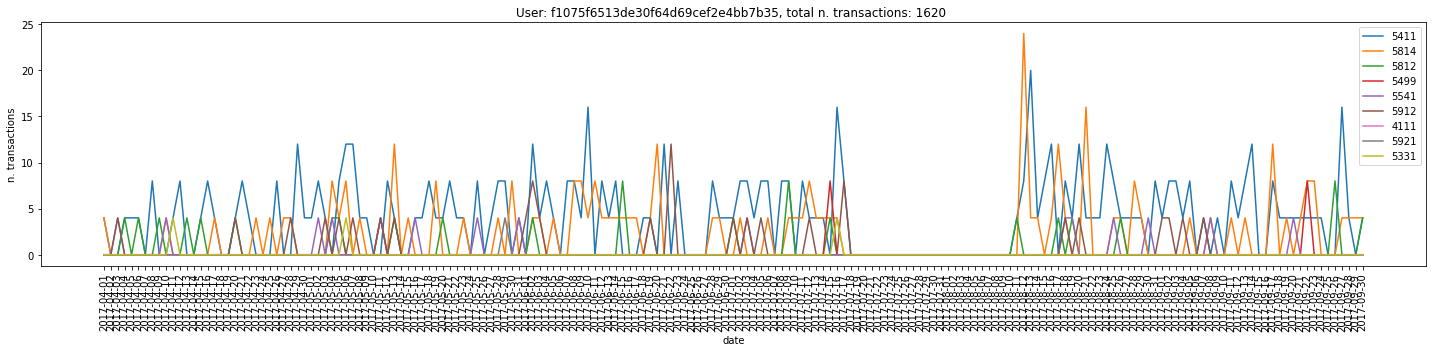

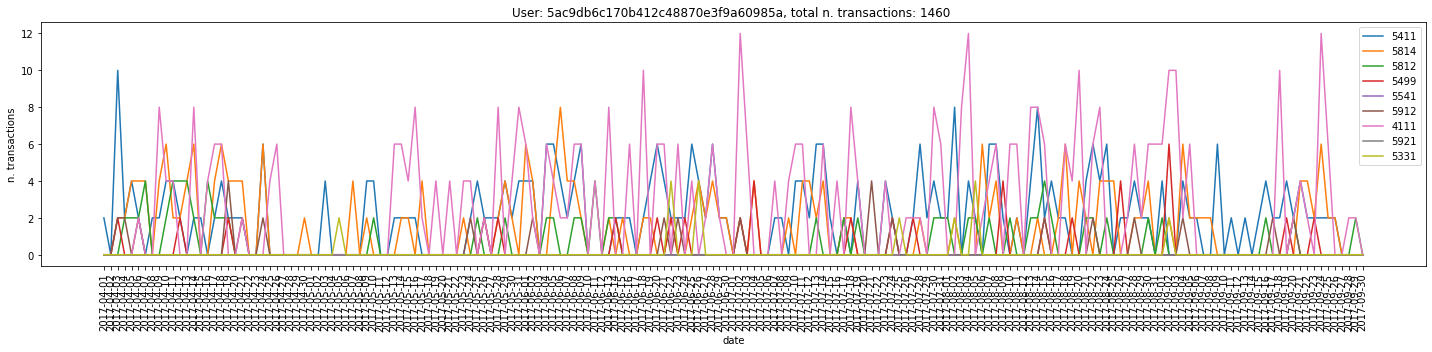

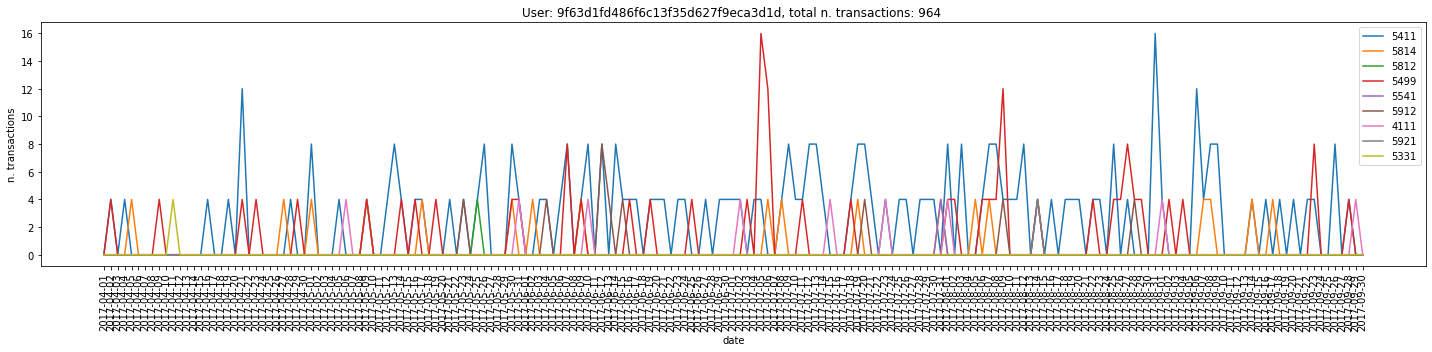

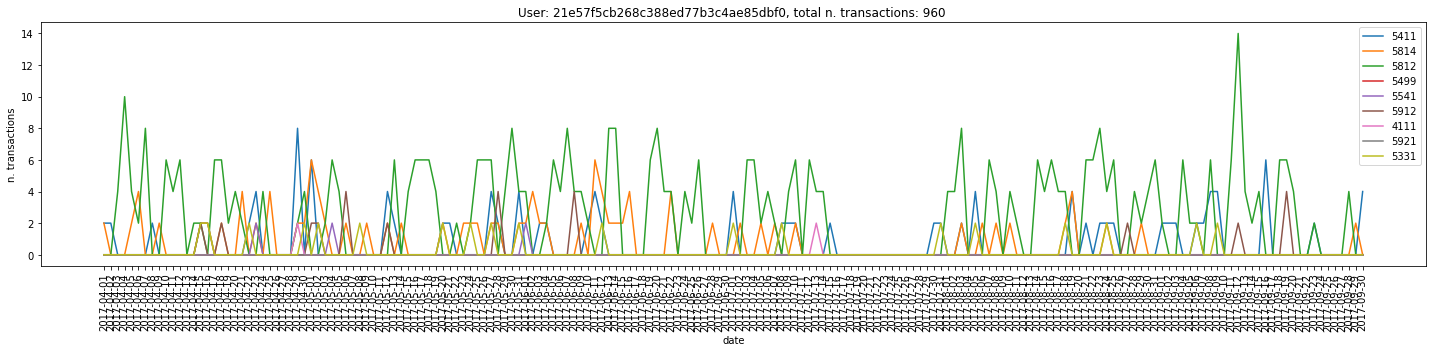

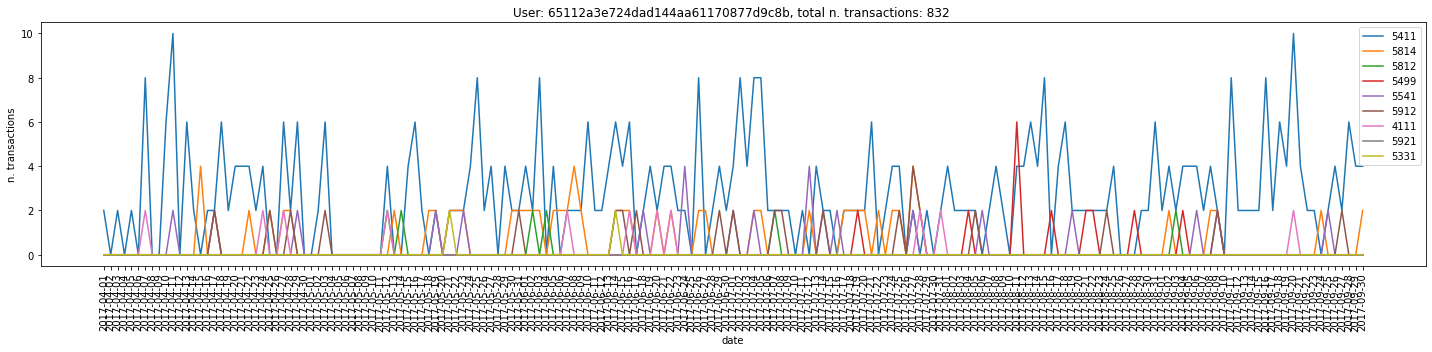

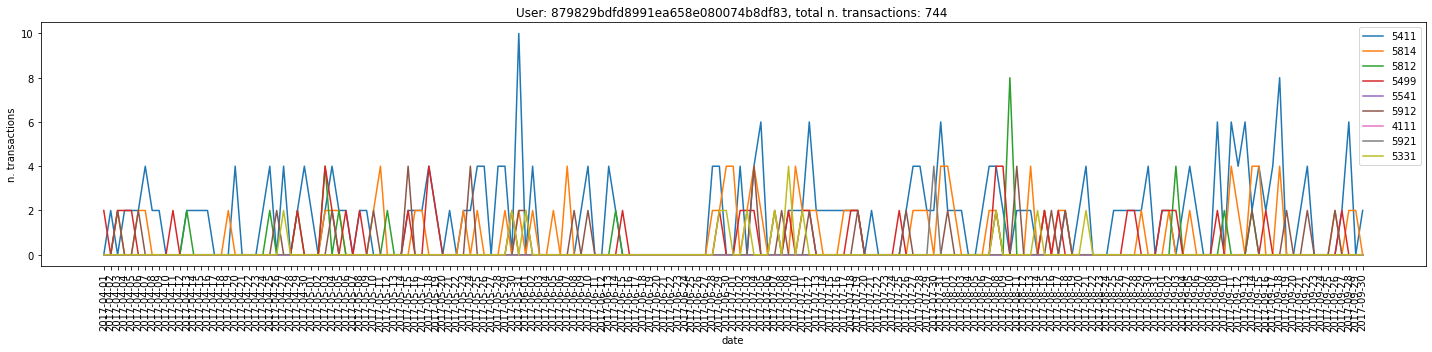

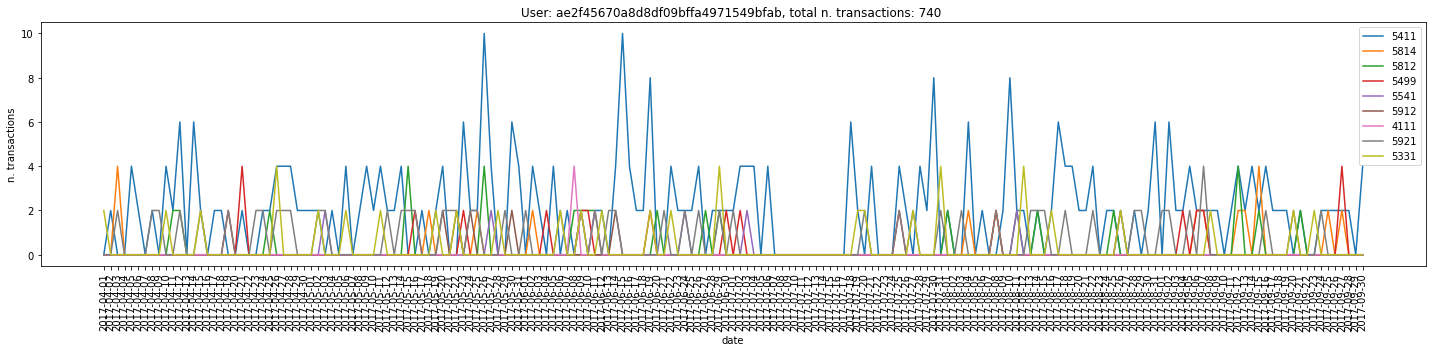

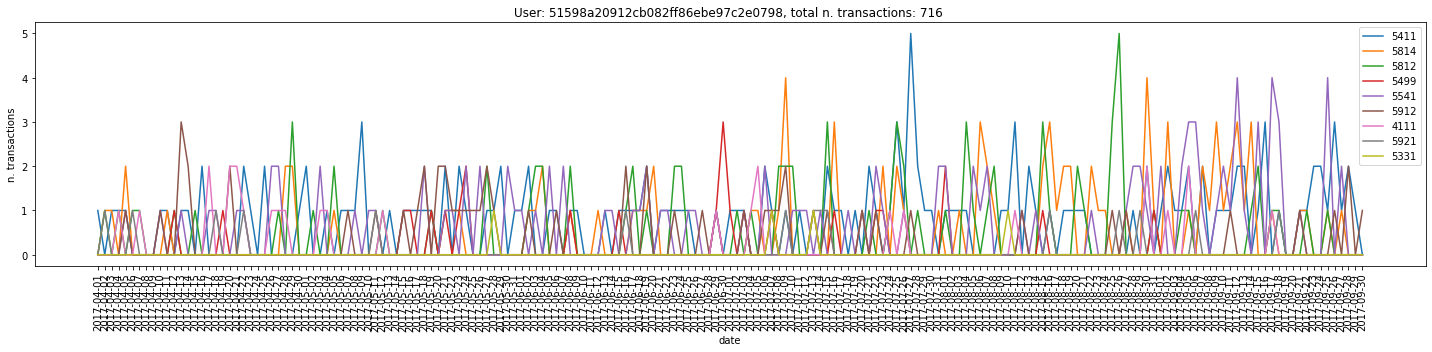

In [186]:
for i, user in enumerate(selected_users):
    subdata_user = grouped_data_users.get_group(user)
    grouped_data_user_mcc = subdata_user.groupby("mcc")
    
    fig = plt.figure(figsize=(20,5))
    for mcc in selected_mcc:
        subdata = grouped_data_mcc.get_group(mcc)
        try:
            subdata_user_mcc = grouped_data_user_mcc.get_group(mcc)
        except KeyError:
            plt.plot(range(len(dates)), [0] * len(dates), label=mcc)
            continue
        subdata_user_mcc_sorted = subdata_user_mcc.sort_values("transaction_date")
        subcounts_user_mcc = subdata_user_mcc_sorted.transaction_date.value_counts()
        plt.plot(range(len(dates)), [subcounts_user_mcc[x] if x in subcounts_user_mcc else 0 for x in dates], label=mcc)
    plt.xticks(range(len(dates)), labels=dates, rotation=90)
    plt.xlabel("date")
    plt.ylabel("n. transactions")
    plt.title("User: %s, total n. transactions: %s " %(user, len(subdata_user)))
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join("results", "user_transactions_%s_%s" %(i, user)))
    plt.show()

Customers have different patterns.

### Time series for each city

In [187]:
data.city.value_counts()

MOSCOW           316032
ST PETERSBURG    161348
EKATERINBURG      16178
N NOVGOROD        14599
NOVOSIBIRSK       13606
                  ...  
DIVYA                 1
RODIONOVO NES         1
BUGRI                 1
VERKHNEURALSK         1
YAZOVO                1
Name: city, Length: 3719, dtype: int64

In [188]:
grouped_data_city = data.groupby("city")
sorted_cities = data.groupby("city").size().sort_values(ascending=False).index

Let's analyze cities that have at least 20000 entries.

In [189]:
N_city = 20000
selected_cities = [city for city in sorted_cities if len(grouped_data_city.get_group(city)) > N_city]

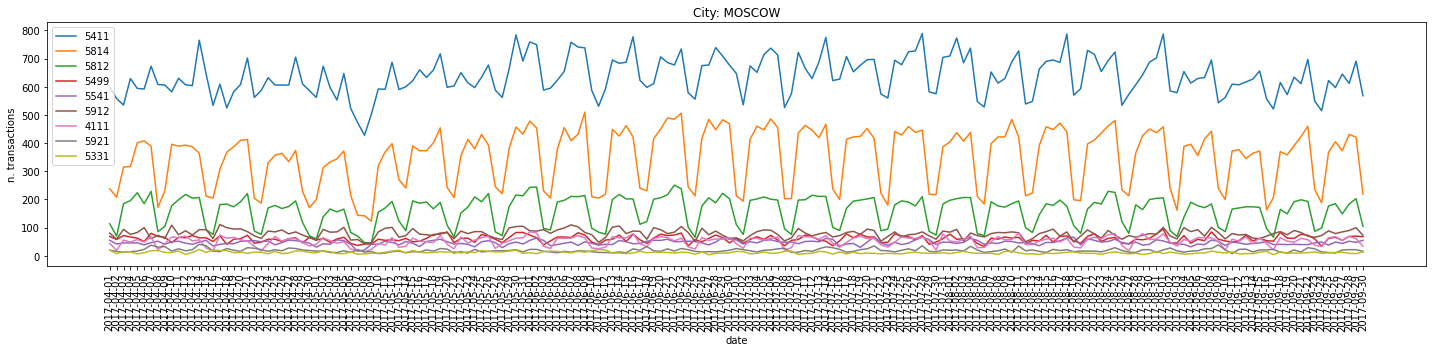

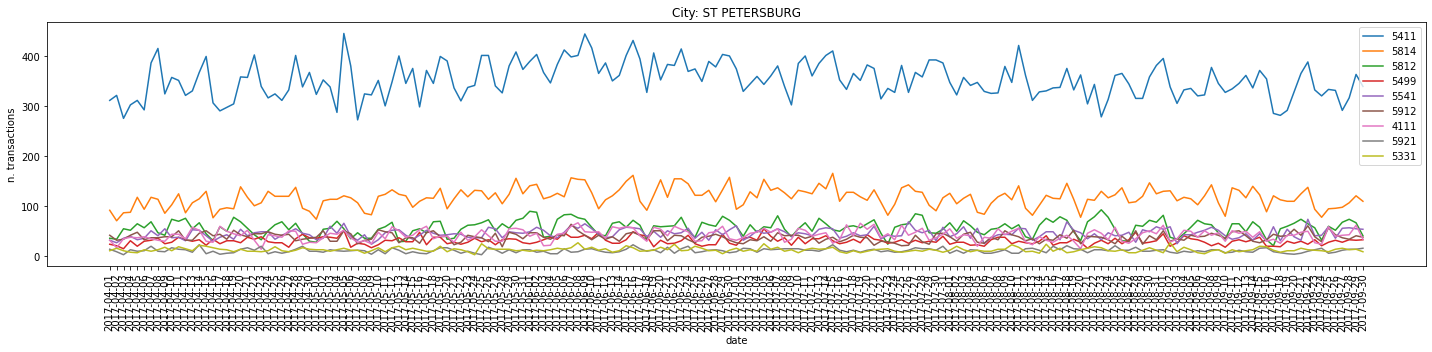

In [190]:
ts_cities = {}
for i, city in enumerate(selected_cities):
    subdata_city = grouped_data_city.get_group(city)
    grouped_data_city_mcc = subdata_city.groupby("mcc")
    ts_cities[city] = {}
    
    fig = plt.figure(figsize=(20,5))
    for mcc in selected_mcc:
        try:
            subdata_city_mcc = grouped_data_city_mcc.get_group(mcc)
        except KeyError:
            plt.plot(range(len(dates)), [0] * len(dates), label=mcc)
            continue
        subdata_city_mcc_sorted = subdata_city_mcc.sort_values("transaction_date")
        subcounts_city_mcc = subdata_city_mcc_sorted.transaction_date.value_counts()
        ts_city_mcc = np.array([subcounts_city_mcc[x] if x in subcounts_city_mcc else 0 for x in dates])
        ts_cities[city][mcc] = ts_city_mcc
        plt.plot(range(len(dates)), ts_city_mcc, label=mcc)
    plt.xticks(range(len(dates)), labels=dates, rotation=90)
    plt.xlabel("date")
    plt.ylabel("n. transactions")
    plt.title("City: %s" %(city))
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join("results", "city_transactions_%s_%s" %(i, city)))
    plt.show()

Let's check for trends and seasonalities

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

In [192]:
def trend_strength(ts, transf = True):

    ts = ts[~np.isnan(ts)]
    
    np.seterr(divide = 'ignore') 
    if transf:
        ts, _ = boxcox(ts)    
        
    decomp = seasonal_decompose(ts, model='additive', period=7)
    fits = decomp.trend + decomp.seasonal
    adj = decomp.observed - fits + np.nanmean(decomp.trend)
    
    v_adj = np.nanvar(adj)
    detrend = decomp.observed - decomp.trend
    deseason = decomp.observed - decomp.seasonal
    
    trend_strength = [max(0, min(1, 1 - v_adj/np.nanvar(deseason))) if np.nanvar(deseason) > 1e-10 else 0]
    season_strength = [max(0, min(1, 1 - v_adj/np.nanvar(detrend))) if np.nanvar(detrend) > 1e-10 else 0]
    
    return trend_strength[0], season_strength[0], ts

All regions:

In [193]:
trend_strengths = {}
season_strengths = {}
for mcc in selected_mcc:
    subdata_mcc = grouped_data_mcc.get_group(mcc)
    subcounts_mcc = subdata_mcc.transaction_date.value_counts()
    trend_strength_mcc, season_strength_mcc, subcounts_mcc = trend_strength(ts_all[mcc])
    trend_strengths[mcc] = trend_strength_mcc
    season_strengths[mcc] = season_strength_mcc
    print("MCC:", mcc, "trend strength:", trend_strength_mcc, "season strength:", season_strength_mcc)

MCC: 5411 trend strength: 0.7139402655439819 season strength: 0.6984778177244824
MCC: 5814 trend strength: 0.6234289375861154 season strength: 0.8560344302458914
MCC: 5812 trend strength: 0.4702969050338074 season strength: 0.8598345105177254
MCC: 5499 trend strength: 0.30390946933479335 season strength: 0.3606418621810512
MCC: 5541 trend strength: 0.6131934996309425 season strength: 0.5742242146047817
MCC: 5912 trend strength: 0.2883148236544516 season strength: 0.3365972382084099
MCC: 4111 trend strength: 0.38613754213643603 season strength: 0.7294141951136408
MCC: 5921 trend strength: 0.3313237410042874 season strength: 0.6944559872871269
MCC: 5331 trend strength: 0.32048136854664466 season strength: 0.29173620233606745


City by city:

In [194]:
trend_strengths_cities = {}
season_strengths_cities = {}

for i, city in enumerate(selected_cities):
    print(city)
    
    trend_strengths_cities[city] = {}
    season_strengths_cities[city] = {}

    for mcc in selected_mcc:
        try:
            ts_city_mcc = ts_cities[city][mcc]
        except KeyError:
            trend_strengths_cities[city][mcc] = None
            season_strengths_cities[city][mcc] = None
            continue
        try:
            trend_strength_city_mcc, season_strength_city_mcc, ts_city_mcc = trend_strength(ts_city_mcc)
            trend_strengths_cities[city][mcc] = trend_strength_city_mcc
            season_strengths_cities[city][mcc] = season_strength_city_mcc
            print("MCC:", mcc, "trend strength:", trend_strength_city_mcc, "season strength:", season_strength_city_mcc)
        except ValueError:
            trend_strengths_cities[city][mcc] = None
            season_strengths_cities[city][mcc] = None
            print("MCC:", mcc, "too few datapoints to get trend and seasonality.")

MOSCOW
MCC: 5411 trend strength: 0.5347913655333366 season strength: 0.6784543685719642
MCC: 5814 trend strength: 0.5110907954419517 season strength: 0.8670365993453566
MCC: 5812 trend strength: 0.4315171125530103 season strength: 0.8520960641368024
MCC: 5499 trend strength: 0.14960489050798453 season strength: 0.3482486713302714
MCC: 5541 trend strength: 0.2909398860444774 season strength: 0.37060482091823466
MCC: 5912 trend strength: 0.23135735040446626 season strength: 0.36946963872190897
MCC: 4111 trend strength: 0.3082350045635638 season strength: 0.71188124290399
MCC: 5921 trend strength: 0.2955322153175628 season strength: 0.370743722142553
MCC: 5331 trend strength: 0.3088387211699821 season strength: 0.09768686310663777
ST PETERSBURG
MCC: 5411 trend strength: 0.40708985948645626 season strength: 0.3556514934702083
MCC: 5814 trend strength: 0.4297490100629203 season strength: 0.41972759634487034
MCC: 5812 trend strength: 0.31496391803070334 season strength: 0.6556392171609522
MC

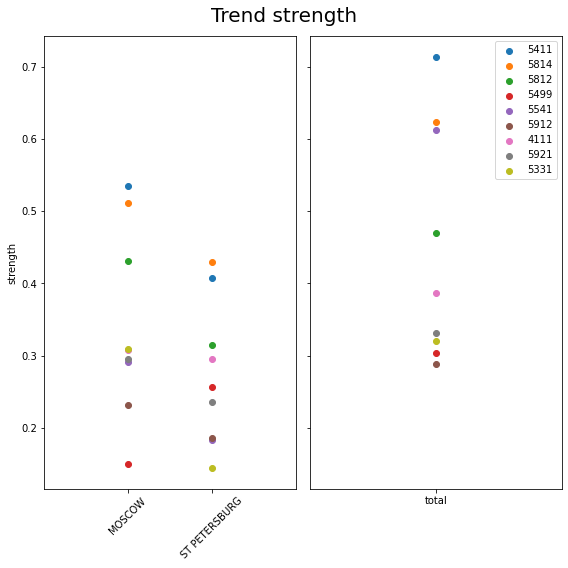

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle("Trend strength", fontsize=20)
ax1.set_ylabel("strength")
for mcc in selected_mcc:
    ax1.scatter(range(len(selected_cities)), [trend_strengths_cities[city][mcc] for city in selected_cities], label=mcc)
    ax2.scatter([0], [trend_strengths[mcc]], label=mcc)
ax1.set_xticks(range(len(selected_cities)))
ax1.set_xticklabels(selected_cities, rotation=45)
ax1.set_xlim(-1, len(selected_cities))
ax2.legend()
ax2.set_xticks([0])
ax2.set_xticklabels(["total"])
plt.tight_layout()
plt.savefig(os.path.join("results", "trend_strength"))
plt.show()

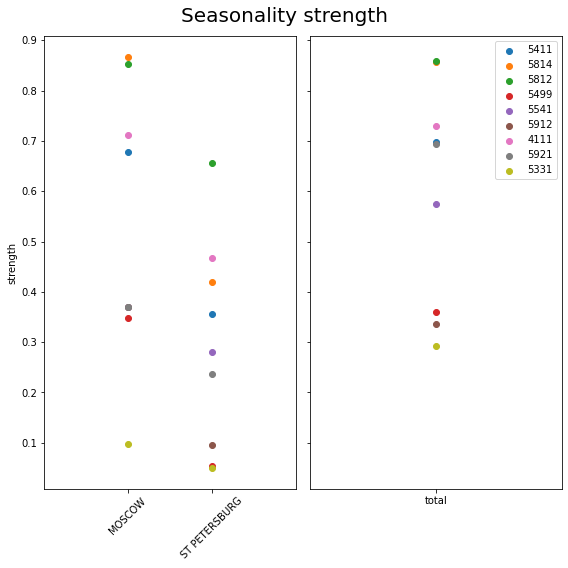

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle("Seasonality strength", fontsize=20)
ax1.set_ylabel("strength")
for mcc in selected_mcc:
    ax1.scatter(range(len(selected_cities)), [season_strengths_cities[city][mcc] for city in selected_cities], label=mcc)
    ax2.scatter([0], [season_strengths[mcc]], label=mcc)
ax1.set_xticks(range(len(selected_cities)))
ax1.set_xticklabels(selected_cities, rotation=45)
ax1.set_xlim(-1, len(selected_cities))
ax2.legend()
ax2.set_xticks([0])
ax2.set_xticklabels(["total"])
plt.tight_layout()
plt.savefig(os.path.join("results", "season_strength"))
plt.show()

High weekly seasonality confirmed.

## Alcohol vs medical care

We group the following MCC into the *Medical* category:
- 5912: PHARMCIES OR DRUG STORES
- 5976: ORTHOPEDIC GOODS, PROSTHETIC DEVICES
- 8062: HOSPITALS
- 8071: DENTAL LABORATORIES OR MEDICAL LABORATORIES
- 8099: MEDICAL SERVICES AND HEALTH PRACTITIONERS (NEC)

We group the following MCC into the *Alcohol* category:
- 5813: ALCOHOLIC BEVERAGES DRINKING PLACES - BARS NIGHTCLUBS ETC
- 5921: LIQUOR, WINE, PACKAGE OR BEER STORES

In [197]:
medical_mcc = [5912, 5976, 8062, 8071, 8099]
alcohol_mcc = [5813, 5921]

In [198]:
medical_mcc_data = data[data.mcc.isin(medical_mcc)]
alcohol_mcc_data = data[data.mcc.isin(alcohol_mcc)]

In [199]:
print("N. transactions - Medical")
print("total: ", len(medical_mcc_data))
print("Moscow: ", len(medical_mcc_data[medical_mcc_data.city == "MOSCOW"]))
print("St. Petersburg: ", len(medical_mcc_data[medical_mcc_data.city == "ST PETERSBURG"]))

N. transactions - Medical
total:  40088
Moscow:  16706
St. Petersburg:  7931


In [200]:
print("N. transactions - Alcohol")
print("total: ", len(alcohol_mcc_data))
print("Moscow: ", len(alcohol_mcc_data[alcohol_mcc_data.city == "MOSCOW"]))
print("St. Petersburg: ", len(alcohol_mcc_data[alcohol_mcc_data.city == "ST PETERSBURG"]))

N. transactions - Alcohol
total:  18272
Moscow:  4352
St. Petersburg:  2397


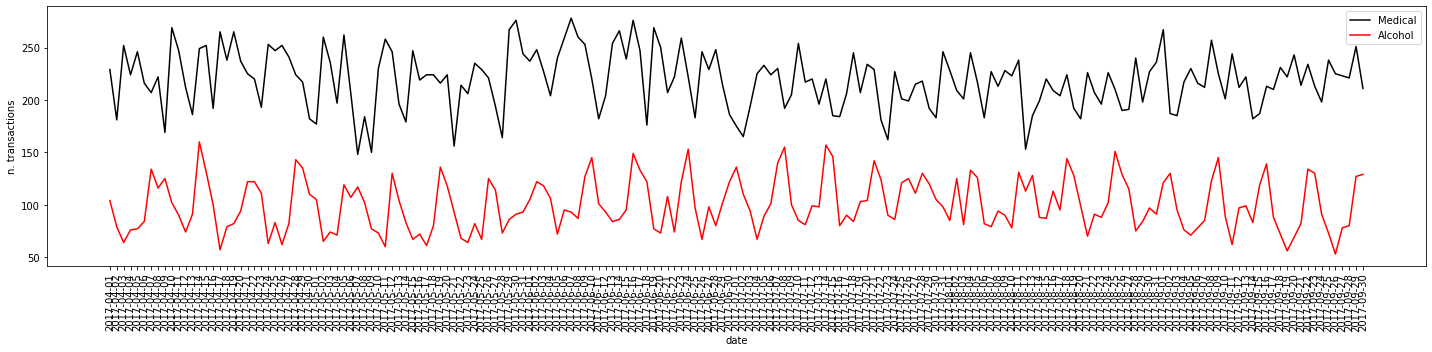

In [201]:
fig = plt.figure(figsize=(20,5))
subcounts_medical_mcc = medical_mcc_data.transaction_date.value_counts()
subcounts_alcohol_mcc = alcohol_mcc_data.transaction_date.value_counts()

ts_all_medical = np.array([subcounts_medical_mcc[x] if x in subcounts_medical_mcc else 0 for x in dates])
ts_all_alcohol = np.array([subcounts_alcohol_mcc[x] if x in subcounts_alcohol_mcc else 0 for x in dates])
ts_all["medical"] = ts_all_medical
ts_all["alcohol"] = ts_all_alcohol

plt.plot(range(len(dates)), ts_all_medical, label="Medical", c="black")
plt.plot(range(len(dates)), ts_all_alcohol, label="Alcohol", c="red")
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("n. transactions")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("results", "medical_alcohol_transactions"))
plt.show()

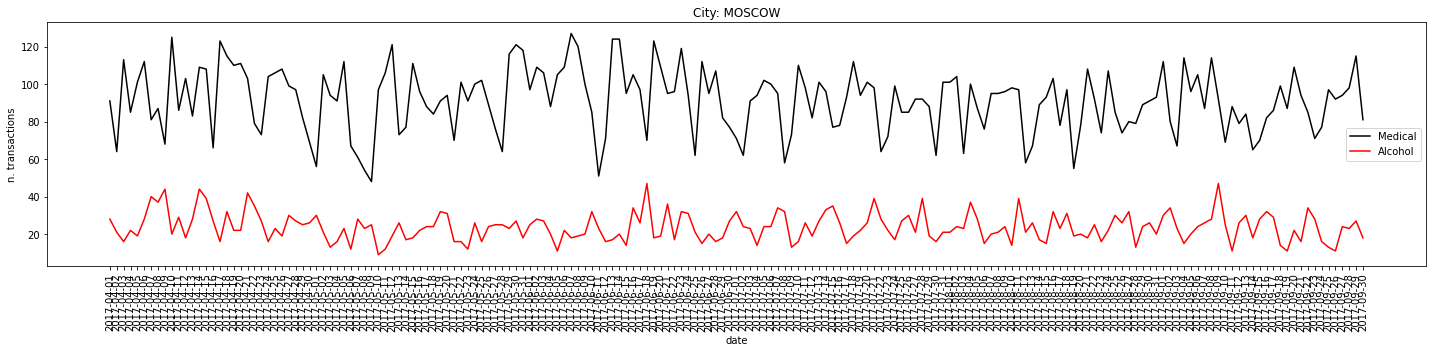

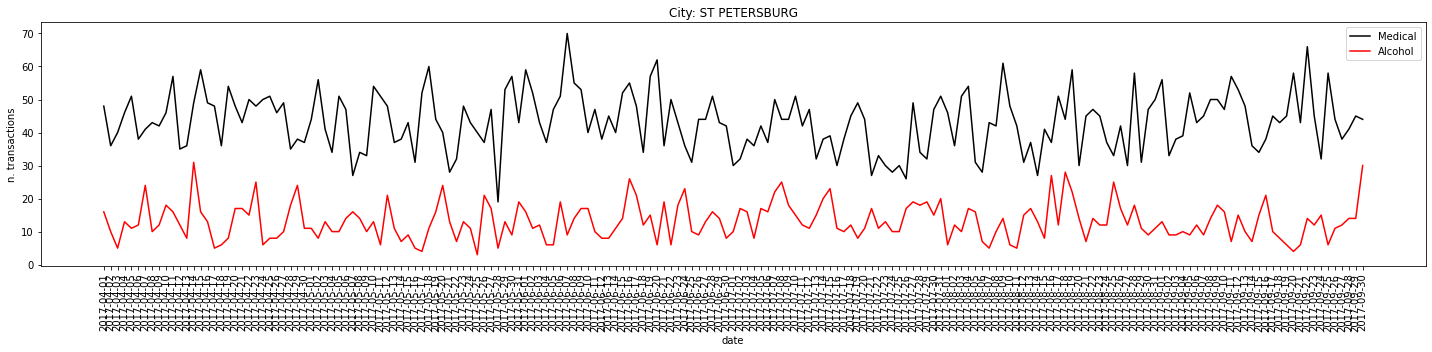

In [202]:
for i, city in enumerate(selected_cities):
    medical_data_city = medical_mcc_data[medical_mcc_data.city == city]
    alcohol_data_city = alcohol_mcc_data[alcohol_mcc_data.city == city]
    
    fig = plt.figure(figsize=(20,5))
    
    subcounts_medical_data_city = medical_data_city.transaction_date.value_counts()
    ts_city_medical = np.array([subcounts_medical_data_city[x] if x in subcounts_medical_data_city else 0 for x in dates])
    ts_cities[city]["medical"] = ts_city_medical
    plt.plot(range(len(dates)), ts_city_medical, label="Medical", c="black")
    
    subcounts_alcohol_data_city = alcohol_data_city.transaction_date.value_counts()
    ts_city_alcohol = np.array([subcounts_alcohol_data_city[x] if x in subcounts_alcohol_data_city else 0 for x in dates])
    ts_cities[city]["alcohol"] = ts_city_alcohol
    plt.plot(range(len(dates)), ts_city_alcohol, label="Alcohol", c="red")
    
    plt.xticks(range(len(dates)), labels=dates, rotation=90)
    plt.xlabel("date")
    plt.ylabel("n. transactions")
    plt.title("City: %s" %(city))
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join("results", "medical_alcohol_city_transactions_%s_%s" %(i, city)))
    plt.show()

In [203]:
trend_strength_medical, season_strength_medical, ts_medical = trend_strength(ts_all["medical"])
print("Medical:", "trend strength:", trend_strength_medical, "season strength:", season_strength_medical)

trend_strength_alcohol, season_strength_alcohol, ts_alcohol = trend_strength(ts_all["alcohol"])
print("Alcohol:", "trend strength:", trend_strength_alcohol, "season strength:", season_strength_alcohol)


Medical: trend strength: 0.3128574608825505 season strength: 0.4593305559800942
Alcohol: trend strength: 0.29099563177515075 season strength: 0.7157788880857128


In [204]:
trend_strengths_cities_medical = {}
season_strengths_cities_medical = {}
trend_strengths_cities_alcohol = {}
season_strengths_cities_alcohol = {}

for i, city in enumerate(selected_cities):
    print(city)
    ts_city_medical = ts_cities[city]["medical"]
    ts_city_alcohol = ts_cities[city]["alcohol"]
    try:
        trend_strength_city_medical, season_strength_city_medical, ts_city_medical = trend_strength(ts_city_medical)
        trend_strengths_cities_medical[city] = trend_strength_city_medical
        season_strengths_cities_medical[city] = season_strength_city_medical
        print("Medical:", "trend strength:", trend_strength_city_medical, "season strength:", season_strength_city_medical)
        
    except ValueError:
        trend_strengths_cities_medical[city] = None
        season_strengths_cities_medical[city] = None
        print("Medical:", "too few datapoints to get trend and seasonality.")
        
    try:
        trend_strength_city_alcohol, season_strength_city_alcohol, ts_city_alcohol = trend_strength(ts_city_alcohol)
        trend_strengths_cities_alcohol[city] = trend_strength_city_alcohol
        season_strengths_cities_alcohol[city] = season_strength_city_alcohol
        print("Alcohol:", "trend strength:", trend_strength_city_alcohol, "season strength:", season_strength_city_alcohol)
        
    except ValueError:
        trend_strengths_cities_alcohol[city] = None
        season_strengths_cities_alcohol[city] = None
        print("Alcohol:", "too few datapoints to get trend and seasonality.")
        
    if len(subcounts_medical_data_city) == len(subcounts_medical_data_city):
        print("Cross-correlation coefficient:", np.corrcoef(ts_city_medical, ts_city_alcohol)[0][1])
    else:
        print("")

MOSCOW
Medical: trend strength: 0.25546188835521966 season strength: 0.43556627457603114
Alcohol: trend strength: 0.18671247023379356 season strength: 0.40115124057751694
Cross-correlation coefficient: -0.12413494311933197
ST PETERSBURG
Medical: trend strength: 0.22231566565657934 season strength: 0.16321524214016025
Alcohol: trend strength: 0.2428652891728892 season strength: 0.3056395819759772
Cross-correlation coefficient: -0.008484915784767025


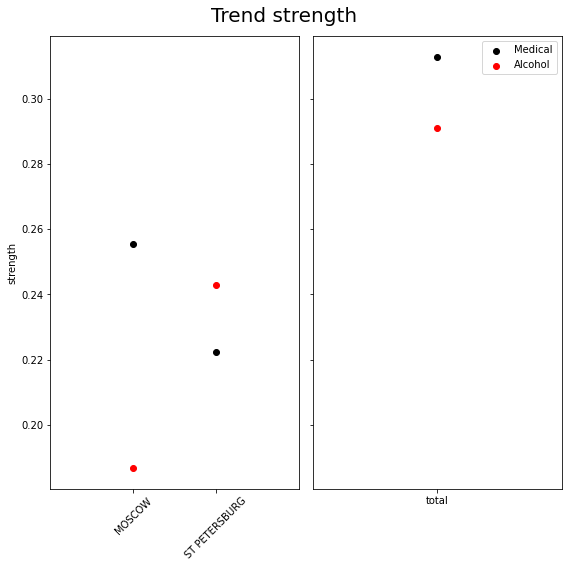

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle("Trend strength", fontsize=20)
ax1.set_ylabel("strength")
ax1.scatter(range(len(selected_cities)), [trend_strengths_cities_medical[city] for city in selected_cities], label="Medical", color="black")
ax2.scatter([0], [trend_strength_medical], label="Medical", color="black")
ax1.scatter(range(len(selected_cities)), [trend_strengths_cities_alcohol[city] for city in selected_cities], label="Alcohol", color="red")
ax2.scatter([0], [trend_strength_alcohol], label="Alcohol", color="red")
ax1.set_xticks(range(len(selected_cities)))
ax1.set_xticklabels(selected_cities, rotation=45)
ax1.set_xlim(-1, len(selected_cities))
ax2.legend()
ax2.set_xticks([0])
ax2.set_xticklabels(["total"])
plt.savefig(os.path.join("results", "trend_strength_medalc"))
plt.tight_layout()
plt.show()

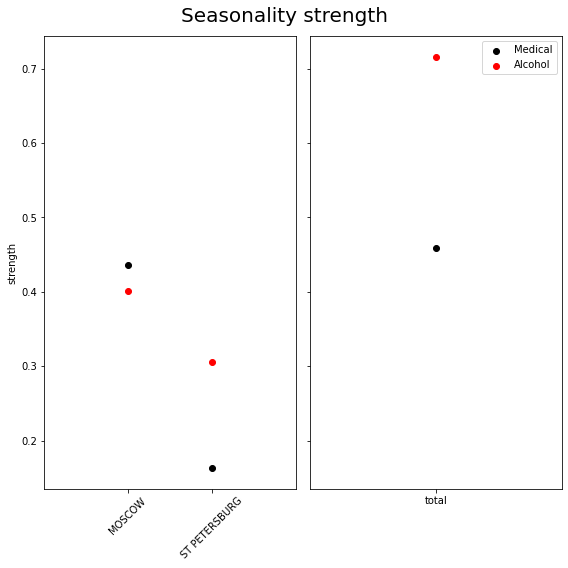

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle("Seasonality strength", fontsize=20)
ax1.set_ylabel("strength")
ax1.scatter(range(len(selected_cities)), [season_strengths_cities_medical[city] for city in selected_cities], label="Medical", color="black")
ax2.scatter([0], [season_strength_medical], label="Medical", color="black")
ax1.scatter(range(len(selected_cities)), [season_strengths_cities_alcohol[city] for city in selected_cities], label="Alcohol", color="red")
ax2.scatter([0], [season_strength_alcohol], label="Alcohol", color="red")
ax1.set_xticks(range(len(selected_cities)))
ax1.set_xticklabels(selected_cities, rotation=45)
ax1.set_xlim(-1, len(selected_cities))
ax2.legend()
ax2.set_xticks([0])
ax2.set_xticklabels(["total"])
plt.savefig(os.path.join("results", "season_strength_medalc"))
plt.tight_layout()
plt.show()

There is some weekly seasonality in Moscow and in the global time series. However, in this case the weekly seasonality is not obvious from the time series plots. Let's produce a spectrogram for these series to check wether other frquencies are present.

In [207]:
import scipy.fftpack as fft

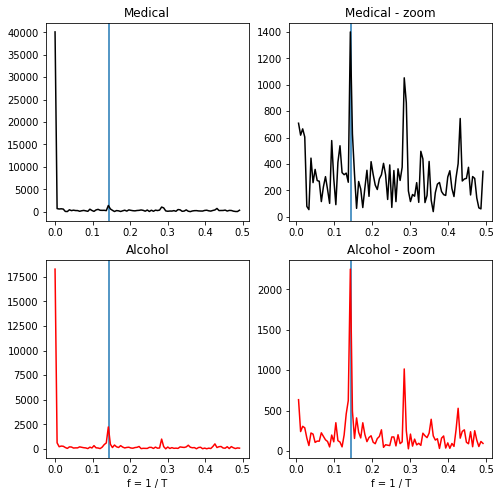

In [208]:
ts_medical = ts_all["medical"]
ts_alcohol = ts_all["alcohol"]

N = len(ts_medical)

yf_medical = fft.fft(ts_medical)
yf_alcohol = fft.fft(ts_alcohol)
xf = fft.fftfreq(N)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8, 8))

# fig.set_title("Fourier Transform")

ax1.axvline(x=1/7)
ax2.axvline(x=1/7)
ax3.axvline(x=1/7)
ax4.axvline(x=1/7)

ax1.plot(xf[:xf.size//2], np.abs(yf_medical[:yf_medical.size//2]), color="black")
ax2.plot(xf[1:xf.size//2], np.abs(yf_medical[1:yf_medical.size//2]), color="black")
ax3.plot(xf[:xf.size//2], np.abs(yf_alcohol[:yf_alcohol.size//2]), color="red")
ax4.plot(xf[1:xf.size//2], np.abs(yf_alcohol[1:yf_alcohol.size//2]), color="red")

ax1.set_title("Medical")
ax2.set_title("Medical - zoom")
ax3.set_title("Alcohol")
ax4.set_title("Alcohol - zoom")

ax3.set_xlabel("f = 1 / T")
ax4.set_xlabel("f = 1 / T")
# ax1.set_ylabel("FT")
# ax3.set_ylabel("FT")

plt.savefig(os.path.join("results", "ftt_medalc"))
plt.show()


There is a peak at f = 1 / 7, confirming a weekly seasonality.

Now we'll take a look at distribution of alcohol transactions per person with more than 200 transictions overall

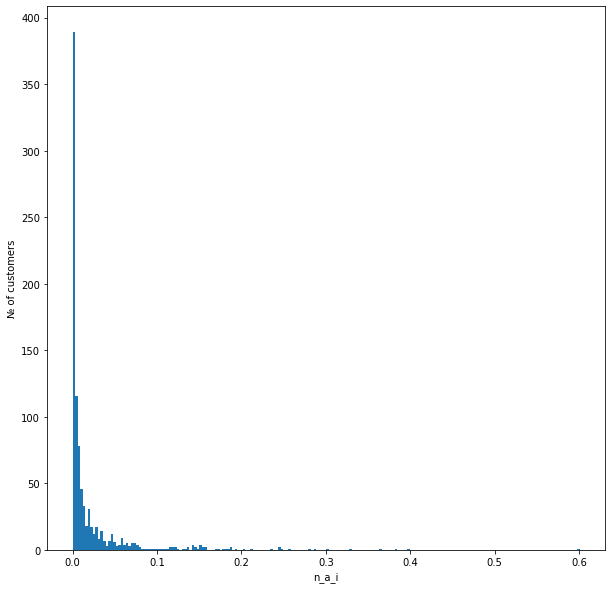

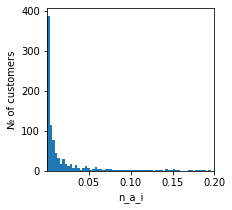

In [209]:
N_user = 200
selected_users_alco = [user for user in sorted_users if len(grouped_data_users.get_group(user)) > N_user]
selected_data = data[data.customer_id.isin(selected_users_alco)]
selected_data_alcohol = selected_data[selected_data.mcc.isin(alcohol_mcc)]
groups_customer = selected_data.groupby("customer_id")
n_a_i = {}

for user in selected_users_alco:
    single_customer = groups_customer.get_group(user)
    all_transactions = len(single_customer)
    single_customer_alco = single_customer[single_customer.mcc.isin(alcohol_mcc)]
    alcohol_transactions = len(single_customer_alco)
    n_a_i[user] = (alcohol_transactions / all_transactions)
    if n_a_i[user] > 0.9:
        print(user, n_a_i[user], alcohol_transactions, all_transactions)

                                   
fig = plt.figure(figsize = (10,10))
plt.hist(n_a_i.values(), 200)
plt.xlabel("n_a_i")
plt.ylabel("№ of customers")
plt.show()

                                   
fig = plt.figure(figsize = (3,3))
plt.hist(n_a_i.values(), 200)
plt.xlabel("n_a_i")
plt.ylabel("№ of customers")
plt.xlim(0.00001, 0.2)
plt.show()


In [210]:
max(n_a_i.values())

0.6009174311926605

In [211]:
data_alcohol_med = selected_data[selected_data.mcc.isin(medical_mcc)]

We define *drinker* someone who has done at least 5% of transactions in the Alcohol category among all his or her trasactions.

In [212]:
drinkers = [customer for customer in n_a_i if n_a_i[customer] >= 0.05]
non_drinkers = [customer for customer in n_a_i if n_a_i[customer] < 0.05]
N_drinkers = len(drinkers)
N_non_drinkers = len(non_drinkers)
print(len(drinkers), len(non_drinkers))

108 810


Let's sample 108 random non-drinkers to have the same size of datasets.

In [213]:
# non_drinkers_red = np.random.choice(non_drinkers, size=N_drinkers)

In [214]:
# len(non_drinkers_red)

In [215]:
med_data_drinkers = data_alcohol_med[data_alcohol_med.customer_id.isin(drinkers)] 
# med_data_non_drinkers = data_alcohol_med[data_alcohol_med.customer_id.isin(non_drinkers_red)]
med_data_non_drinkers = data_alcohol_med[data_alcohol_med.customer_id.isin(non_drinkers)]

subcounts_med_data_drinkers = med_data_drinkers.transaction_date.value_counts()
subcounts_med_data_non_drinkers = med_data_non_drinkers.transaction_date.value_counts()

ts_med_data_drinkers = np.array([subcounts_med_data_drinkers[x] if x in subcounts_med_data_drinkers else 0 for x in dates])
ts_med_data_non_drinkers = np.array([subcounts_med_data_non_drinkers[x] if x in subcounts_med_data_non_drinkers else 0 for x in dates])

In [216]:
data_alcohol = selected_data[selected_data.mcc.isin(alcohol_mcc)]

In [217]:
alc_data_drinkers = data_alcohol[data_alcohol.customer_id.isin(drinkers)] 
# alc_data_non_drinkers = data_alcohol[data_alcohol.customer_id.isin(non_drinkers_red)]
alc_data_non_drinkers = data_alcohol[data_alcohol.customer_id.isin(non_drinkers)]

subcounts_alc_data_drinkers = alc_data_drinkers.transaction_date.value_counts()
subcounts_alc_data_non_drinkers = alc_data_non_drinkers.transaction_date.value_counts()

In [218]:
subcounts_alc_data_drinkers.values.sum()

4036

In [219]:
subcounts_alc_data_non_drinkers.values.sum()

1796

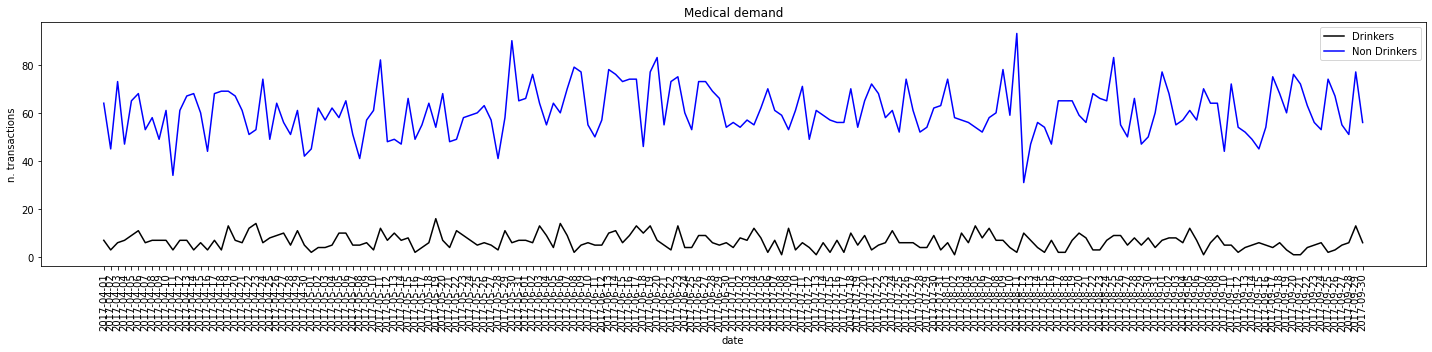

In [220]:
fig = plt.figure(figsize=(20,5))

plt.plot(range(len(dates)), ts_med_data_drinkers, label="Drinkers", c="black")
plt.plot(range(len(dates)), ts_med_data_non_drinkers, label="Non Drinkers", c="blue")

plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.xlabel("date")
plt.ylabel("n. transactions")
plt.title("Medical demand")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("results", "medical_drinkers_vs_nondrinkers"))
plt.show()

In [221]:
np.corrcoef(ts_med_data_drinkers, ts_med_data_non_drinkers)

array([[1.        , 0.05996727],
       [0.05996727, 1.        ]])

In [222]:
from scipy import correlate

In [223]:
np.correlate(ts_med_data_drinkers, ts_med_data_non_drinkers)

array([72348])

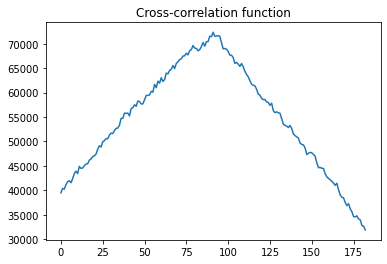

In [224]:
plt.figure()
plt.plot(np.correlate(ts_med_data_drinkers, ts_med_data_non_drinkers, "same"))
plt.title("Cross-correlation function")
plt.savefig(os.path.join("results", "medical_drinkers_vs_nondrinkers_xcross"))
plt.show()

Let's calculate the probability that a drinker (or a non drinker) uses a medical service during the week following a transaction in alcohol.

In [225]:
data_alcohol_med = selected_data[selected_data.mcc.isin(medical_mcc + alcohol_mcc)]

In [226]:
med_data_drinkers = data_alcohol_med[data_alcohol_med.customer_id.isin(drinkers)] 
med_data_non_drinkers = data_alcohol_med[data_alcohol_med.customer_id.isin(non_drinkers_red)]

In [227]:
import datetime
def add_one_day(date):
    date = datetime.date.fromisoformat(date)
    return str(date + datetime.timedelta(days=1))

In [228]:
drinkers_N_corr = []
for test_user in drinkers:
    test_data_user = med_data_drinkers[med_data_drinkers.customer_id == test_user]
    test_data_user_alcohol = test_data_user[test_data_user.mcc.isin(alcohol_mcc)]
    test_data_user_med = test_data_user[test_data_user.mcc.isin(medical_mcc)]
    for index, transaction in test_data_user_alcohol.iterrows():
        date = transaction.transaction_date
        N_correlated_medicals = 0
        for i in range(1, 8):
            date = add_one_day(date)
            correlated_medicals = len(test_data_user_med[test_data_user_med.transaction_date == date])
            N_correlated_medicals += correlated_medicals
        drinkers_N_corr += [N_correlated_medicals]

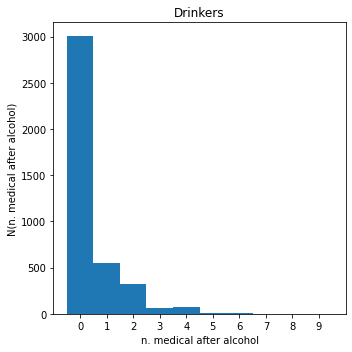

In [229]:
plt.figure(figsize=(5,5))
plt.hist(drinkers_N_corr, bins=(np.arange(-.5, max(drinkers_N_corr)+.5)))
plt.title("Drinkers")
plt.xlabel("n. medical after alcohol")
plt.ylabel("N(n. medical after alcohol)")
plt.xticks(range(max(drinkers_N_corr)))
plt.tight_layout()
plt.savefig(os.path.join("results", "hist_drinkers"))
plt.show()

In [230]:
non_drinkers_N_corr = []
for test_user in non_drinkers:
    test_data_user = med_data_non_drinkers[med_data_non_drinkers.customer_id == test_user]
    test_data_user_alcohol = test_data_user[test_data_user.mcc.isin(alcohol_mcc)]
    test_data_user_med = test_data_user[test_data_user.mcc.isin(medical_mcc)]
    for index, transaction in test_data_user_alcohol.iterrows():
        date = transaction.transaction_date
        N_correlated_medicals = 0
        for i in range(1, 8):
            date = add_one_day(date)
            correlated_medicals = len(test_data_user_med[test_data_user_med.transaction_date == date])
            N_correlated_medicals += correlated_medicals
        non_drinkers_N_corr += [N_correlated_medicals]

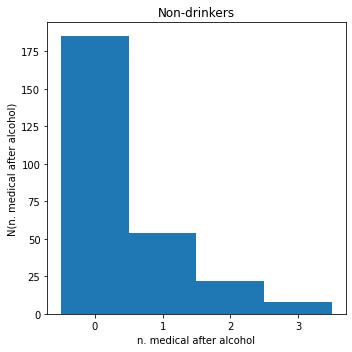

In [231]:
plt.figure(figsize=(5,5))
plt.hist(non_drinkers_N_corr, bins=(np.arange(-.5, max(non_drinkers_N_corr)+.5)))
plt.title("Non-drinkers")
plt.xlabel("n. medical after alcohol")
plt.ylabel("N(n. medical after alcohol)")
plt.xticks(range(max(non_drinkers_N_corr)))
plt.tight_layout()
plt.savefig(os.path.join("results", "hist_non_drinkers"))
plt.show()

In [232]:
sum(non_drinkers_N_corr)

130

In [135]:
sum(drinkers_N_corr)

1874

## Predictive model

Let's use the first two months of a time series to forecast the next 4 months.

Moscow, mcc = 5814 (fast food restaurants) and mcc = 5912 (pharmacies, lower seasonality)

In [150]:
import statsmodels.graphics.tsaplots as tsaplots

MOSCOW
----------
5814 : FAST FOOD RESTAURANTS
Sum = 63937
Mean = 349.38
Std = 102.36
Trend strength = 0.51
Seasonality strength = 0.87


<Figure size 432x288 with 0 Axes>

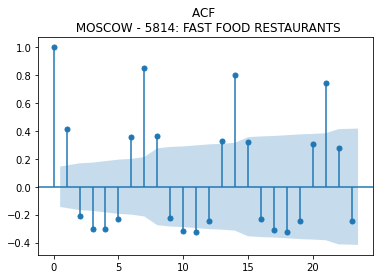

<Figure size 432x288 with 0 Axes>

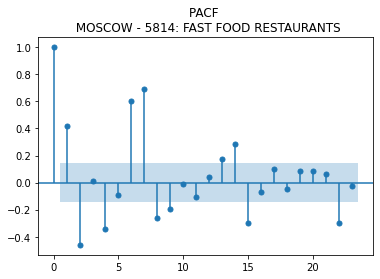

----------
----------
5912 : PHARMCIES OR DRUG STORES
Sum = 14508
Mean = 79.28
Std = 14.47
Trend strength = 0.23
Seasonality strength = 0.37


<Figure size 432x288 with 0 Axes>

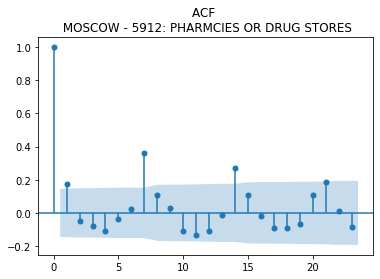

<Figure size 432x288 with 0 Axes>

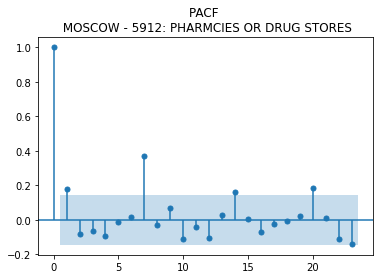

----------


In [151]:
city = "MOSCOW"
mccs = [5814, 5912]
mcc_names = ["FAST FOOD RESTAURANTS", "PHARMCIES OR DRUG STORES"]

print("===========")
print(city)
for mcc, mcc_name in zip(mccs, mcc_names):
    print("----------")
    print(mcc, ":", mcc_name)
    ts_city_mcc = ts_cities[city][mcc]
    print("Sum = %s" %sum(ts_city_mcc))
    print("Mean = %.2f" %np.mean(ts_city_mcc))
    print("Std = %.2f" %np.std(ts_city_mcc))
    print("Trend strength = %.2f" %trend_strengths_cities[city][mcc])
    print("Seasonality strength = %.2f" %season_strengths_cities[city][mcc])
    plt.figure()
    tsaplots.plot_acf(ts_city_mcc)
    plt.title("ACF \n %s - %s: %s" %(city, mcc, mcc_name))
    plt.savefig(os.path.join("results", "ACF_%s_%s" %(city, mcc)))
    plt.show()
    
    plt.figure()
    tsaplots.plot_pacf(ts_city_mcc)
    plt.title("PACF \n %s - %s: %s" %(city, mcc, mcc_name))
    plt.savefig(os.path.join("results", "PACF_%s_%s" %(city, mcc)))
    plt.show()
    print("----------")
    
print("===========")

Estimate ARMA parameters:
- positive ACF at lag=1 -> AR (not MA) -> p>0, q=0
- 2 spikes in PACF -> AR(2)


### SARIMA

Implementation adapted from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [153]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [154]:
def SARIMA(X, train_size, order=(0,0,0), seasonal_order=(0,0,0,0)):
    train, test = X[0:train_size], X[train_size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
    return test, predictions, model_fit

In [155]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [156]:
def evaluate_model(test, predictions, metric="MAPE"):
    if metric == "MAPE":
        error = mean_absolute_percentage_error(test, predictions)
    elif metric == "MSE":
        error = mean_squared_error(test, predictions)
    elif metric == "R2":
        error = r2_score(test, predictions)
    return error

Grid search for the p, d, q, P,D,Q,S parameters. Adapted from https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [157]:
import warnings
warnings.filterwarnings("ignore")

In [158]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_SARIMA_models(dataset, train_size, p_values, d_values, q_values, P_values, D_values, Q_values, S_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                             for S in S_values:
                                order = (p,d,q)
                                seasonal_order = (P, D, Q, S)
                                try:
                                    test, predictions, _ = SARIMA(dataset, train_size, order=order, seasonal_order=seasonal_order)
                                    error = evaluate_model(test, predictions)
                                    if error < best_score:
                                        best_score, best_cfg = error, (order, seasonal_order)
                                    print('SARIMA%s MAPE=%.3f' % (order, seasonal_order, error))
                                except:
                                    continue
    print('Best SARIMA%s MAPE=%.3f' % (best_cfg, best_score))
    return best_cfg, best_score

In [159]:
train_size = 61 # train on April and March

In [160]:
best_cfgs = {city: {} for city in ["MOSCOW"]}
models = {city: {} for city in ["MOSCOW"]}

When fitting a time series with a strong seasonal pattern, you generally should try
- ARIMA(0,1,q)(0,1,1) model (q=1 or 2)
- ARIMA(p,0,0)(0,1,1)+c model (p=1, 2 or 3)

(from http://people.duke.edu/~rnau/Slides_on_ARIMA_models--Robert_Nau.pdf)

We try ARIMA(p,0,0)(0,1,1)+c model (p=1, 2 or 3) because the ACF at lag=1 is positive (probably AR, not MA)

In [161]:
p_values = [1,2,3]
d_values = [0]
q_values = [0]
P_values = [0]
D_values = [1]
Q_values = [1]
S_values = [7]

5814 : FAST FOOD RESTAURANTS
Best SARIMA((1, 0, 0), (0, 1, 1, 7)) MAPE=7.991
Test MAPE: 7.991
Test R-squared: 0.874


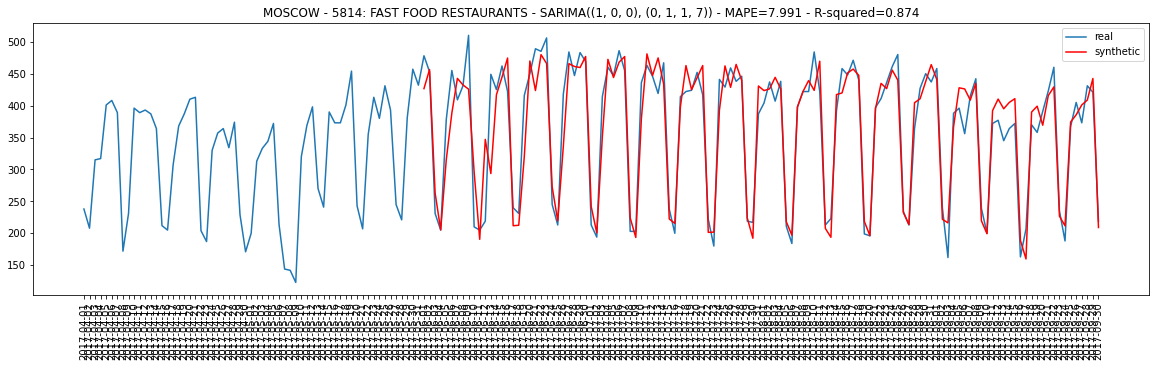

In [162]:
mcc = mccs[0]
mcc_name = mcc_names[0]

print(mcc, ":", mcc_name)
ts_city_mcc = ts_cities[city][mcc]
best_cfg, best_score = evaluate_SARIMA_models(ts_city_mcc, train_size, p_values, d_values, q_values, P_values, D_values, Q_values, S_values)
(order, seasonal_order) = best_cfg
best_cfgs[city][mcc] = best_cfg
test, predictions, model = SARIMA(ts_city_mcc, train_size, order=order, seasonal_order=seasonal_order)
models[city][mcc] = model
error = evaluate_model(test, predictions)
r2 = evaluate_model(test, predictions, metric="R2")
print('Test MAPE: %.3f' %error)
print('Test R-squared: %.3f' %r2)
# plot
plt.figure(figsize=(20,5))
plt.plot(dates, ts_city_mcc, label="real")
plt.plot(dates[train_size:], predictions, color='red', label="synthetic")
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.title("%s - %s: %s - SARIMA%s - MAPE=%.3f - R-squared=%.3f" %(city, mcc, mcc_name, best_cfg, error, r2))
plt.legend()
plt.savefig(os.path.join("results","SARIMA_%s_%s" %(city, mcc)))
plt.show()

5912 : PHARMCIES OR DRUG STORES
Best SARIMA((1, 0, 0), (0, 1, 1, 7)) MAPE=12.632
Test MAPE: 12.632
Test R-squared: 0.282


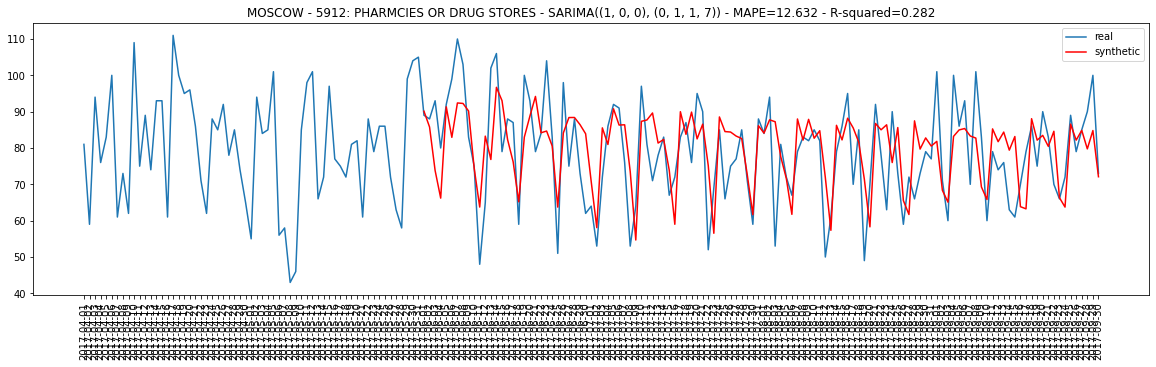

In [163]:
mcc = mccs[1]
mcc_name = mcc_names[1]

print(mcc, ":", mcc_name)
ts_city_mcc = ts_cities[city][mcc]
best_cfg, best_score = evaluate_SARIMA_models(ts_city_mcc, train_size, p_values, d_values, q_values, P_values, D_values, Q_values, S_values)
(order, seasonal_order) = best_cfg
best_cfgs[city][mcc] = best_cfg
test, predictions, model = SARIMA(ts_city_mcc, train_size, order=order, seasonal_order=seasonal_order)
models[city][mcc] = model
error = evaluate_model(test, predictions)
r2 = evaluate_model(test, predictions, metric="R2")
print('Test MAPE: %.3f' %error)
print('Test R-squared: %.3f' %r2)
# plot
plt.figure(figsize=(20,5))
plt.plot(dates, ts_city_mcc, label="real")
plt.plot(dates[train_size:], predictions, color='red', label="synthetic")
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.title("%s - %s: %s - SARIMA%s - MAPE=%.3f - R-squared=%.3f" %(city, mcc, mcc_name, best_cfg, error, r2))
plt.legend()
plt.savefig(os.path.join("results","SARIMA_%s_%s" %(city, mcc)))
plt.show()

The prediction for the fast food is pretty good, because there is a high seasonality. Can we use the model trained in Moscow to predict on another city? Let's try on St. Petersburg. *Note: we shift and rescale the prediction based on average and std of the training series of Moscow and the known series of St. Petersburg.*

Test MAPE: 11.793
Test R-squared: 0.012


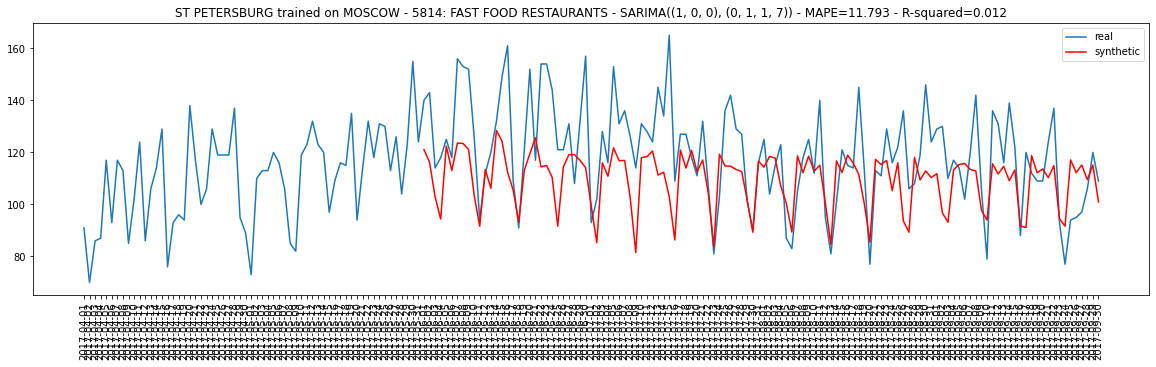

In [127]:
city2 = "ST PETERSBURG"
mcc = mccs[0]
mcc_name = mcc_names[0]

model = models[city][mcc]

ts_city_mcc2 = ts_cities[city2][mcc]
train = ts_city_mcc[0:train_size]
known = ts_city_mcc2[0:train_size]
test = ts_city_mcc2[train_size:]

#rescale
std1 = np.std(train)
std2 = np.std(known)
#shift
av1 = np.mean(train)
av2 = np.mean(known)
predictions2 = (predictions - av1)/ std1 * std2 + av2

error = evaluate_model(test, predictions2)
r2 = evaluate_model(test, predictions2, metric="R2")
print('Test MAPE: %.3f' %error)
print('Test R-squared: %.3f' %r2)

# plot
plt.figure(figsize=(20,5))
plt.plot(dates, ts_city_mcc2, label="real")
plt.plot(dates[train_size:], predictions2, color='red', label="synthetic")
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.title("%s trained on %s - %s: %s - SARIMA%s - MAPE=%.3f - R-squared=%.3f" %(city2, city, mcc, mcc_name, best_cfg, error, r2))
plt.legend()
plt.savefig(os.path.join("results","SARIMA_%s_%s_%s" %(city2, city, mcc)))
plt.show()

Test MAPE: 19.870
Test R-squared: -0.014


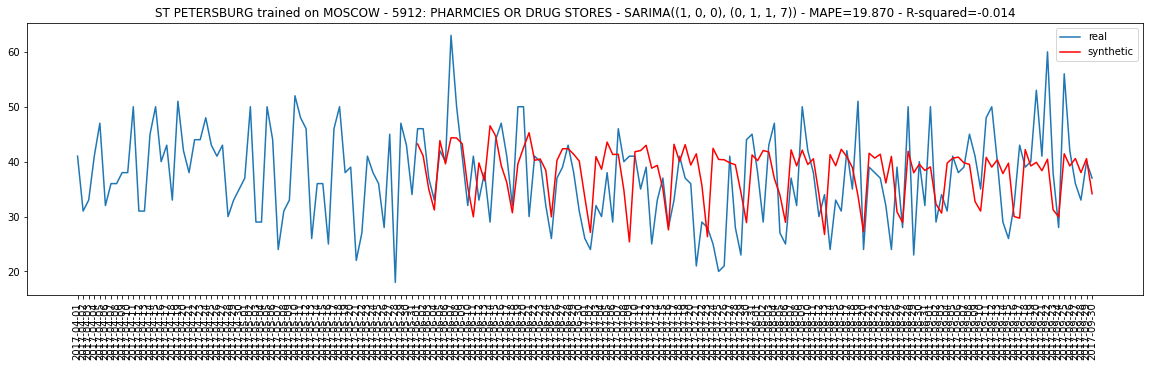

In [128]:
city2 = "ST PETERSBURG"
mcc = mccs[1]
mcc_name = mcc_names[1]

model = models[city][mcc]

ts_city_mcc2 = ts_cities[city2][mcc]
train = ts_city_mcc[0:train_size]
known = ts_city_mcc2[0:train_size]
test = ts_city_mcc2[train_size:]

#rescale
std1 = np.std(train)
std2 = np.std(known)
#shift
av1 = np.mean(train)
av2 = np.mean(known)
predictions2 = (predictions - av1)/ std1 * std2 + av2

error = evaluate_model(test, predictions2)
r2 = evaluate_model(test, predictions2, metric="R2")
print('Test MAPE: %.3f' %error)
print('Test R-squared: %.3f' %r2)

# plot
plt.figure(figsize=(20,5))
plt.plot(dates, ts_city_mcc2, label="real")
plt.plot(dates[train_size:], predictions2, color='red', label="synthetic")
plt.xticks(range(len(dates)), labels=dates, rotation=90)
plt.title("%s trained on %s - %s: %s - SARIMA%s - MAPE=%.3f - R-squared=%.3f" %(city2, city, mcc, mcc_name, best_cfg, error, r2))
plt.legend()
plt.savefig(os.path.join("results","SARIMA_%s_%s_%s" %(city2, city, mcc)))
plt.show()